In [1]:
from astropy.table import Table
from typing import Tuple
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import corv
import os

from tqdm import tqdm
from scripts import make_bins

plt.style.use('stefan.mplstyle')

Could not import Koester models. Contact arseneau@bu.edu if these are needed.
/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


In [3]:
spyobjs = pd.read_csv(os.path.join('data', 'reference_objs.csv'))
spyobjs.head()

,Name,GaiaDR2,SPYTeff,SPYlogg,Rem,FileName,RAJ2000,DEJ2000,jul_date,obsname,SOURCE_ID,r_med_geo,GaiaEDR3,TeffH,e_TeffH,loggH,e_loggH
0,EC12489-2750,3495397496775173248,61045,7.63,NaN,EC12489m2750_a_2000_07_13T01_26_13_all.dat.gz,192.921000,-28.113139,2.451739e+06,ec12489m2750_a_2451738_55988057004,3495397496775173248,450.91998,3495397496775173248,NaN,NaN,NaN,NaN
1,EC12489-2750,3495397496775173248,61045,7.63,NaN,EC12489m2750_b_2000_07_15T23_51_15_all.dat.gz,192.921000,-28.113139,2.451741e+06,ec12489m2750_b_2451741_49392732,3495397496775173248,450.91998,3495397496775173248,NaN,NaN,NaN,NaN
2,HE0031-5525,4921390960477978112,11839,7.71,NaN,HE0031m5525_a_2002_07_27T06_08_16_all.dat.gz,8.400417,-55.144139,2.452483e+06,he0031m5525_a_2452482_75575103005,4921390960477978112,67.78850,4921390960477978112,11781.27,156.85,7.912382,0.022214
3,HE0031-5525,4921390960477978112,11839,7.71,NaN,HE0031m5525_b_2001_12_17T00_51_42_all.dat.gz,8.400417,-55.144139,2.452261e+06,he0031m5525_b_2452260_53590983013,4921390960477978112,67.78850,4921390960477978112,11781.27,156.85,7.912382,0.022214
4,HE0032-2744,2343355051714253056,23947,7.81,NaN,HE0032m2744_a_2002_09_15T03_00_04_all.dat.gz,8.657667,-27.472250,2.452533e+06,he0032m2744_a_2452532_62505119015,2343355051714253056,164.07458,2343355051714253056,23414.51,815.16,7.875835,0.058884


In [11]:
data_lines, data_names = np.load('linecenters.npy'), np.load('names_linecenters.npy')
model_lines, model_names = np.load('linecenters_model.npy'), np.load('names_linecenters_model.npy')
data_names[0], model_names[0]

(np.str_('ec12489m2750_a_2451738_55988057004'),
 np.str_('ec12489m2750_a_2451738_55988057004'))

100%|██████████| 4/4 [00:00<00:00,  6.38it/s]


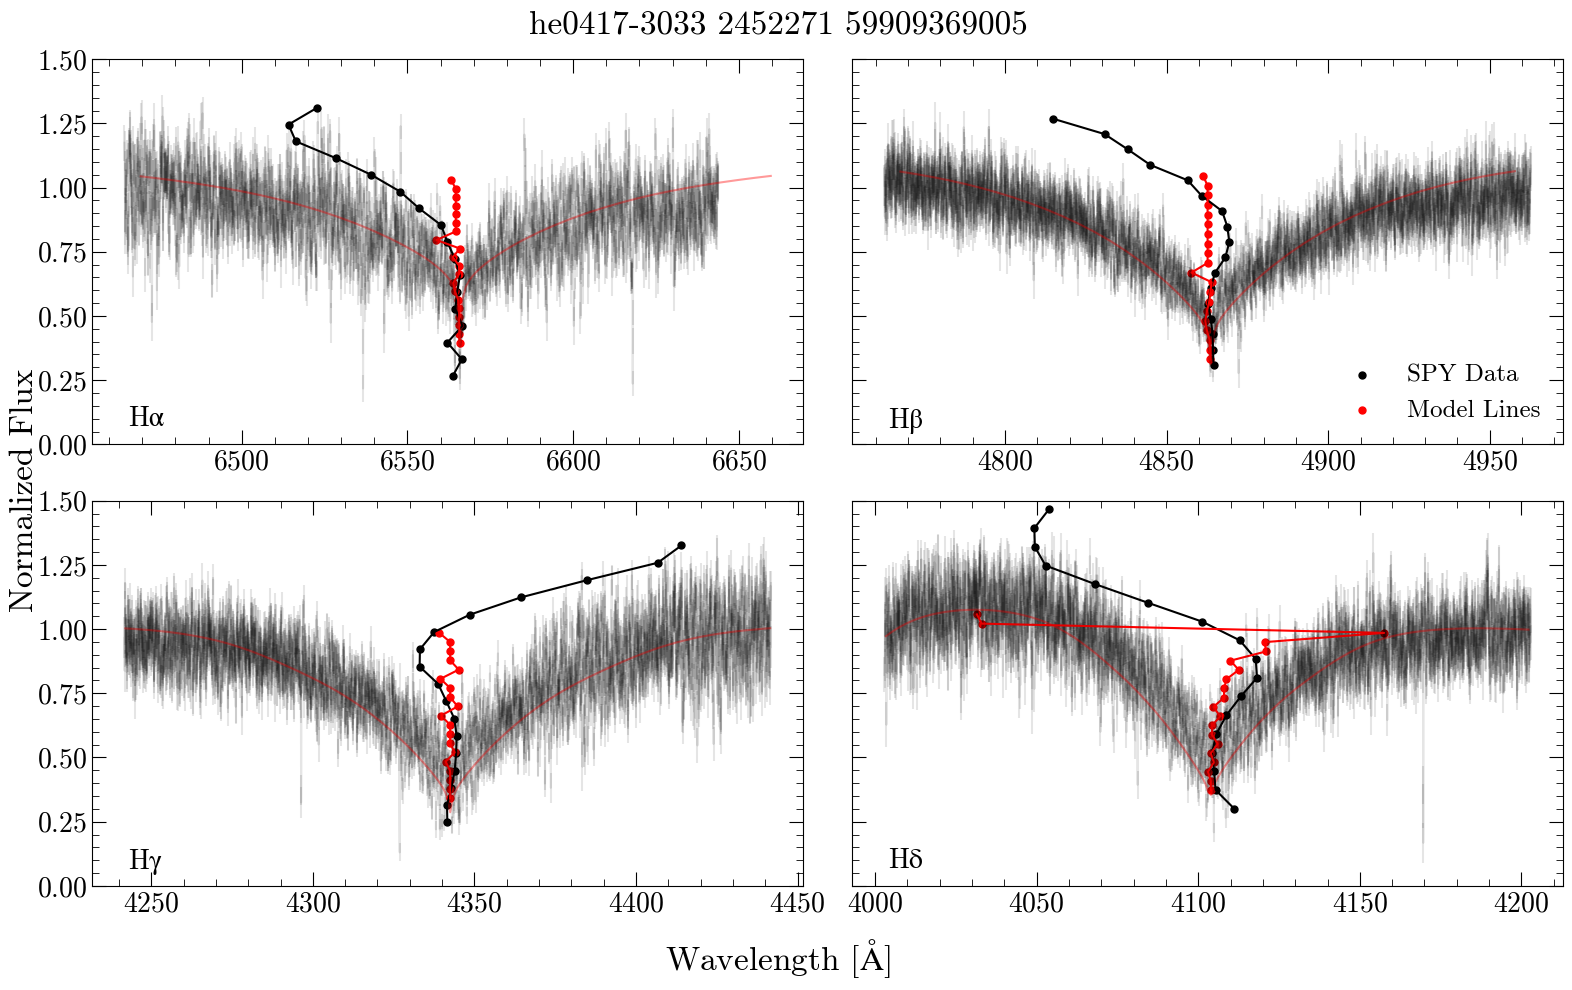

In [24]:
names = {'a' : 'H$\\alpha$', 'b' : 'H$\\beta$', 'g' : 'H$\\gamma$', 'd' : 'H$\\delta$'}
n = 100
obsname = data_names[n]
m = np.where((model_names == data_names[n]))[0][0]

fig, ax = plt.subplots(ncols=2, nrows=2, sharey = True, figsize = (16, 10))
ax_flat = ax.flat
for i, line in tqdm(enumerate(names.keys()), total = len(names)):
    params, wavl, flux, ivar = make_bins.read_nlte_spectrum(data_names[n])
    wavl_cutout, flux_cutout, ivar_cutout = make_bins.cutout_line(wavl, flux, ivar, line = line, window = 100)

    params, wavl, flux, ivar = make_bins.read_model_spectrum(model_names[m])
    wavl_model, flux_model, ivar_model = make_bins.cutout_line(wavl, flux, ivar, line = line, window = 100)

    ax_flat[i].errorbar(wavl_cutout, flux_cutout, np.sqrt(1/ivar_cutout), c = 'k', alpha=0.1)
    ax_flat[i].plot(wavl_model, flux_model, c='red', alpha=0.4)
    # centers of the data
    ax_flat[i].scatter(data_lines[n,i,0], data_lines[n,i,2], color = 'k', label = 'SPY Data')
    ax_flat[i].plot(data_lines[n,i,0], data_lines[n,i,2], color = 'k')
    # centers of the model
    ax_flat[i].scatter(model_lines[m,i,0], model_lines[m,i,2], color = 'red', label = 'Model Lines')
    ax_flat[i].plot(model_lines[m,i,0], model_lines[m,i,2], color = 'red')
    ax_flat[i].text(0.05, 0.10, names[line], transform=ax_flat[i].transAxes, fontsize=20, verticalalignment='top')
    ax_flat[i].set_ylim(0, 1.5)
ax_flat[1].legend(framealpha=0)
fig.supylabel('Normalized Flux', fontsize=24)
fig.supxlabel('Wavelength $[\\AA]$', fontsize=24)
fig.suptitle(obsname.replace('_', ' '), fontsize = 24)
fig.tight_layout()